In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
credit_df = pd.read_csv('credit_risk_dataset.csv')

In [204]:
# Separate data into two sets: one with missing values and one without
df_missing = credit_df[credit_df['person_emp_length'].isnull()]
df_not_missing = credit_df[~credit_df['person_emp_length'].isnull()]

In [205]:
from sklearn.linear_model import LinearRegression

In [206]:
# define the features (independent variables) and target (person_emp_length)
# use 'person_income' and 'loan_amnt' as features
features = ['person_income', 'loan_amnt']
target = 'person_emp_length'

In [207]:
# Create and fit a linear regression model on the data without missing values
regression_model = LinearRegression()
regression_model.fit(df_not_missing[features], df_not_missing[target])

LinearRegression()

In [208]:
# Predict the missing values
imputed_values = regression_model.predict(df_missing[features])

In [209]:
# update the DataFrame with the imputed values
credit_df.loc[credit_df['person_emp_length'].isnull(), 'person_emp_length'] = imputed_values

In [210]:
# doing the same for 'loan_int_rate'
# split into two - one with missing, the other without
df_missing = credit_df[credit_df['loan_int_rate'].isnull()]
df_not_missing = credit_df[~credit_df['loan_int_rate'].isnull()]

In [211]:
# define the features (independent variables) and target (person_emp_length)
# use 'person_income' and 'loan_amnt' as features
features = ['person_income', 'loan_amnt']
target = 'person_emp_length'

In [212]:
# create and fit a linear regression model on the data without missing values
regression_model = LinearRegression()
regression_model.fit(df_not_missing[features], df_not_missing[target])

LinearRegression()

In [213]:
# predict the missing values
imputed_values = regression_model.predict(df_missing[features])

In [214]:
#update the DataFrame with the imputed values
credit_df.loc[credit_df['loan_int_rate'].isnull(), 'loan_int_rate'] = imputed_values

In [215]:
credit_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [216]:
from sklearn.linear_model import LogisticRegression

In [217]:
# using logistic regression to predict probable values for new "probability of default" column
# including 'cb_person_default_on_file' as a feature for this regression model
# one-hot encoding to convert 'cb_person_default_on_file' into numeric format
X = pd.get_dummies(credit_df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'cb_person_default_on_file', 'loan_grade']], columns=['cb_person_default_on_file', 'loan_grade'], drop_first=True)
y = credit_df['loan_status']

logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# predicting pd
pd_values = logistic_model.predict_proba(X)[:, 1]  # Probability of Default

# adding pd values to existing dataframe
credit_df['pd'] = pd_values

In [218]:
# adding a column for loss given default using recovery rate
# calculating recovery rate
credit_df['ead'] = credit_df['loan_amnt'] - credit_df['loan_amnt'] * credit_df['loan_percent_income']
# to calculate exposure at default
credit_df['recovery_rate'] = (credit_df['ead'] - (credit_df['pd'] * credit_df['ead'])) / credit_df['ead']

# calculating loss given default as a percentage
credit_df['lgd'] = (1 - credit_df['recovery_rate']) * 100

In [376]:
subset_default = credit_df[credit_df['loan_status'] == 1]

In [377]:
subset_default.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,pd,ead,recovery_rate,lgd
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0.791633,14350.0,0.208367,79.163304
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.548939,2365.0,0.451061,54.893922
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.744661,16450.0,0.255339,74.466121
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.820827,15750.0,0.179173,82.082651
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.466055,1875.0,0.533945,46.605501
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,0.645284,19250.0,0.354716,64.528444
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,0.627817,19600.0,0.372183,62.781653
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,0.588635,20300.0,0.411365,58.863487
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,0.441246,1344.0,0.558754,44.124576
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4,0.568799,20650.0,0.431201,56.879887


In [378]:
subset_default.shape

(7108, 16)

In [379]:
# create a copy of the subset to prevent the SettingWithCopyWarning
subset_default = credit_df[credit_df['loan_status'] == 1].copy()

# perform the calculation on the copied DataFrame
subset_default['expected_loss'] = subset_default['pd'] * subset_default['ead'] * subset_default['lgd']

In [380]:
subset_default.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,pd,ead,recovery_rate,lgd,expected_loss
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0.791633,14350.0,0.208367,79.163304,8.992899e+05
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.548939,2365.0,0.451061,54.893922,7.126555e+04
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.744661,16450.0,0.255339,74.466121,9.121859e+05
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.820827,15750.0,0.179173,82.082651,1.061166e+06
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.466055,1875.0,0.533945,46.605501,4.072636e+04
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,0.645284,19250.0,0.354716,64.528444,8.015546e+05
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,0.627817,19600.0,0.372183,62.781653,7.725410e+05
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,0.588635,20300.0,0.411365,58.863487,7.033768e+05
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,0.441246,1344.0,0.558754,44.124576,2.616739e+04
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4,0.568799,20650.0,0.431201,56.879887,6.680939e+05


In [381]:
subset_default['expected_loss'].head(20)

0     8.992899e+05
2     7.126555e+04
3     9.121859e+05
4     1.061166e+06
5     4.072636e+04
6     8.015546e+05
7     7.725410e+05
8     7.033768e+05
9     2.616739e+04
10    6.680939e+05
11    6.649708e+04
12    4.820558e+05
13    2.743840e+05
17    5.876638e+05
18    2.128324e+05
19    2.809449e+04
22    8.646797e+05
24    6.878958e+05
25    7.840642e+05
26    6.906497e+04
Name: expected_loss, dtype: float64

In [382]:
subset_default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7108 entries, 0 to 32578
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7108 non-null   int64  
 1   person_income               7108 non-null   int64  
 2   person_home_ownership       7108 non-null   object 
 3   person_emp_length           7108 non-null   float64
 4   loan_intent                 7108 non-null   object 
 5   loan_grade                  7108 non-null   object 
 6   loan_amnt                   7108 non-null   int64  
 7   loan_int_rate               7108 non-null   float64
 8   loan_status                 7108 non-null   int64  
 9   loan_percent_income         7108 non-null   float64
 10  cb_person_default_on_file   7108 non-null   object 
 11  cb_person_cred_hist_length  7108 non-null   int64  
 12  pd                          7108 non-null   float64
 13  ead                         7108

In [384]:
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
# drop categorical variables
#pd.get_dummies(credit_df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'cb_person_default_on_file', 'loan_grade']], columns=['cb_person_default_on_file', 'loan_grade'], drop_first=True)
subset_default = pd.get_dummies(subset_default, columns=categorical_columns, drop_first=True)

In [346]:
subset_default = subset_default.astype(np.float32)

In [385]:
subset_default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7108 entries, 0 to 32578
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   7108 non-null   int64  
 1   person_income                7108 non-null   int64  
 2   person_emp_length            7108 non-null   float64
 3   loan_amnt                    7108 non-null   int64  
 4   loan_int_rate                7108 non-null   float64
 5   loan_status                  7108 non-null   int64  
 6   loan_percent_income          7108 non-null   float64
 7   cb_person_cred_hist_length   7108 non-null   int64  
 8   pd                           7108 non-null   float64
 9   ead                          7108 non-null   float64
 10  recovery_rate                7108 non-null   float64
 11  lgd                          7108 non-null   float64
 12  expected_loss                7108 non-null   float64
 13  person_home_owner

In [386]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [387]:
# running model with all features before performing PCA
X = subset_default.drop(columns=['expected_loss']) # x values
y = subset_default['expected_loss']


In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [389]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

In [390]:
# scaling
scaler = StandardScaler()

In [391]:
X_train = scaler.fit_transform(X_train)


In [392]:
X_train

array([[-0.23310342, -1.10276942, -0.03963944, ..., -0.15416438,
        -0.09031073, -0.66156922],
       [-0.23310342, -0.51653499, -0.53520407, ..., -0.15416438,
        -0.09031073, -0.66156922],
       [-0.23310342,  1.41043929,  1.42826206, ...,  6.48658289,
        -0.09031073, -0.66156922],
       ...,
       [ 1.20272162, -0.51653499, -1.02607061, ..., -0.15416438,
        11.07288109, -0.66156922],
       [ 0.56457716, -0.08228727,  0.44652899, ..., -0.15416438,
        -0.09031073,  1.51155763],
       [-0.55217565, -0.97010674,  0.20109573, ..., -0.15416438,
        -0.09031073, -0.66156922]])

In [393]:
y_train

15942    52374.637308
1822     13313.286687
14739    68653.159065
5018     29094.531788
5191     18602.751821
             ...     
16646     5713.200406
22788    81251.638472
22911    97841.197152
23812    68280.919761
2068     36278.278290
Name: expected_loss, Length: 5686, dtype: float64

In [394]:
from sklearn.model_selection import GridSearchCV

In [395]:
# initializing and fitting stochastic gradient descent model and cross validation


parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

sgd1 = SGDRegressor()
clf = GridSearchCV(sgd1, parameters, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']})

In [396]:
best_estimator=clf.best_estimator_
best_estimator

SGDRegressor(alpha=0.001, penalty='l1')

In [397]:
X_test = scaler.transform(X_test)

In [398]:
sgd2 = SGDRegressor(alpha=0.001, penalty='l1')
sgd2 = sgd2.fit(X_test, y_test)

In [399]:
y_pred=sgd2.predict(X_test)

In [400]:
from sklearn import metrics

In [406]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

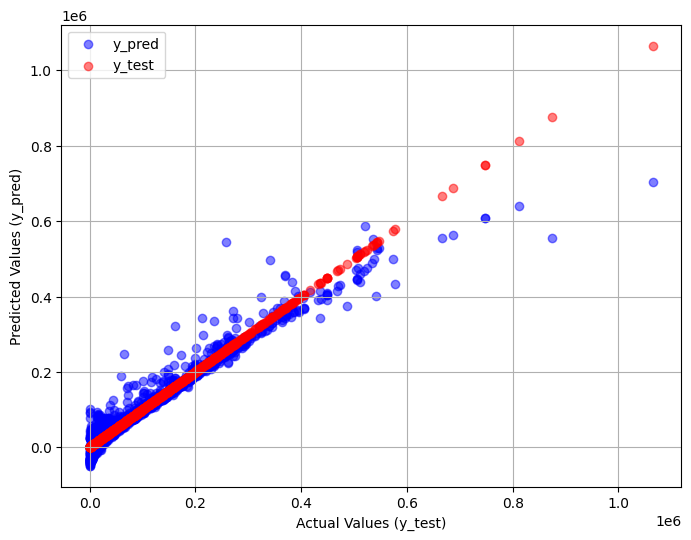

In [416]:
# Create a scatter plot with different colors for y_pred and y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='y_pred', c='blue', marker='o')
plt.scatter(y_test, y_test, alpha=0.5, label='y_test', c='red', marker='o')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid(True)
plt.legend()
plt.show()

**Despite the RMSE value being very high, the plot shows that the predicted values are not very far off from the test values. Considering the large order of magnitude for the value of 'Expected Loss', the RMSE of 30.379.19 may not be too bad, given the context**
**It is also possible this data was not properly cleaned before entering it into the stochastic gradient descent. Furthermore, the SGD might not have been the best choice for this type of issue either. Combining all these facts together, I have come to a conclusion that more work needs to be put into the calculation of expected loss, along with more information as, theoretically, there is a lot of historical data that goes into the calculation of credit risk and expected loss from loan defaults**